# Tarefa 3

## Breast Cancer Wisconsin (Diagnostic) Dataset - UCI Machine Learning Repository

Este dataset contém 569 instâncias e 30 atributos numéricos que descrevem características extraídas de imagens digitalizadas de exames de tumores mamários. Esses atributos incluem:

- Radius: Média do raio (distância do centro aos pontos do perímetro)
Texture: Desvio padrão dos valores de cinza da superfície celular
- Perimeter: Perímetro médio
- Area: Área média
- Smoothness: Variação local nos comprimentos dos raios
- Compactness: (Perímetro² / Área - 1.0)
- Concavity: Severidade das concavidades na superfície celular
- Concave points: Número de pontos côncavos no contorno
- Symmetry: Simetria da célula
- Fractal dimension: Dimensão fractal ("aproximação" da irregularidade)

O objetivo será agrupar as instâncias com base nas características celulares para encontrar padrões entre diferentes tipos de tumores.

Link para o dataset:
[Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

## Metodologia

Aplicar o algoritmo de K-Means para identificar padrões e similaridades entre tumores mamários a partir das características celulares fornecidas no dataset. O objetivo será agrupar os dados e explorar se os clusters resultantes correspondem a padrões de benignidade ou malignidade dos tumores.

1. Coleta e preparação de dados:
  - Carregar e explorar o dataset para compreender as variáveis e o formato dos dados.
  - Realizar o pré-processamento necessário, como normalização e tratamento de valores ausentes.

2. Aplicação do K-Means:
  - Utilizar o algoritmo K-Means para agrupar os tumores com base nas características celulares.
  - Avaliar diferentes números de clusters (valores de K) e interpretar os resultados.

3. Análise dos clusters:
  - Identificar padrões comuns nos clusters, como características celulares típicas de tumores malignos ou benignos.
  - Explorar a relação entre os clusters e a variável de saída (benigno/maligno) para validar os agrupamentos.

4. Visualização dos resultados:
  - Utilizar técnicas como PCA (Análise de Componentes Principais) para reduzir a dimensionalidade e visualizar os clusters em gráficos.

## Conclusões:

Discutir como os agrupamentos podem ajudar na estratificação dos pacientes e no entendimento dos fatores celulares que influenciam o risco de malignidade.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install ucimlrepo

In [4]:
# Carregar o dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [5]:
# Criar um DataFrame com as features
df = pd.DataFrame(X)

In [6]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df_target = pd.DataFrame(y)

In [14]:
df_target.Diagnosis.unique()

array(['M', 'B'], dtype=object)

In [15]:
# Escalar os dados (normalização)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [17]:
# Definir o número de clusters (K) - valor inicial
k = 2  # Sabemos que existem 2 classes no dataset

In [18]:
# Aplicar o KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [19]:
# Adicionar os labels dos clusters ao DataFrame
df['Cluster'] = kmeans.labels_

In [20]:
# Reduzir a dimensionalidade para 2 componentes principais (PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

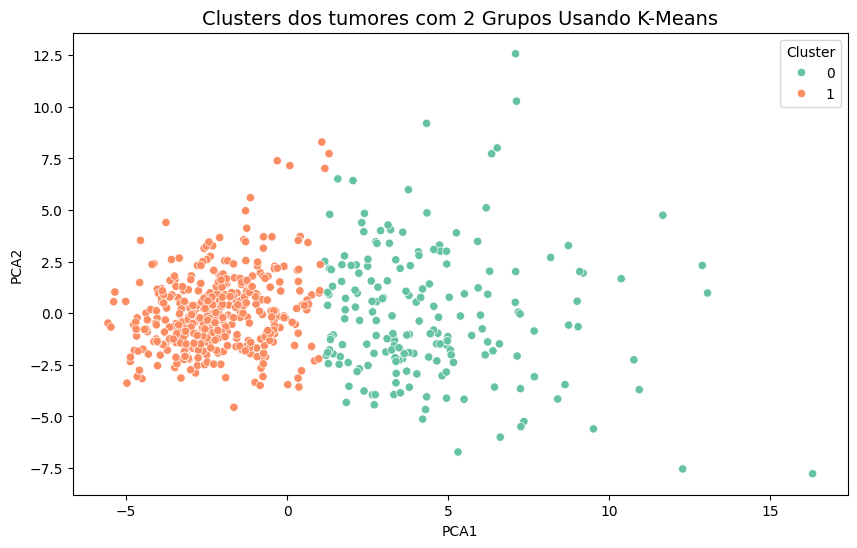

In [22]:
# Visualização dos clusters em 2D com base no PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title(f'Clusters dos tumores com {k} Grupos Usando K-Means', fontsize=14)
plt.show()

In [23]:
# Verificar o número de amostras em cada cluster
print(df['Cluster'].value_counts())

Cluster
1    381
0    188
Name: count, dtype: int64


In [24]:
# Tentativa com valores de K diferentes e usando a métrica do método Elbow
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

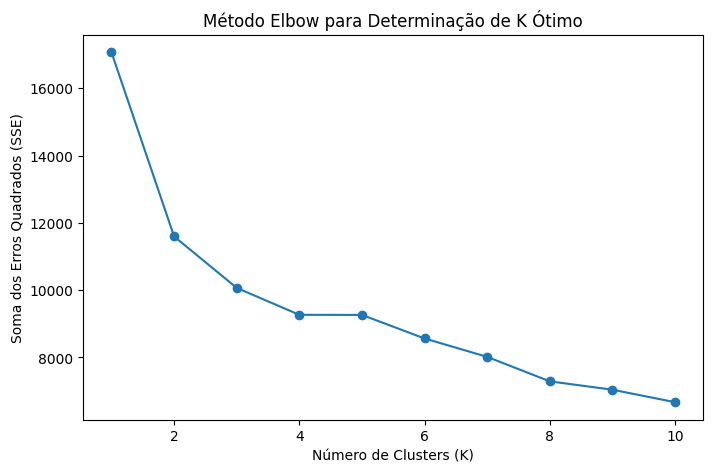

In [25]:
# Visualização do método Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Método Elbow para Determinação de K Ótimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Soma dos Erros Quadrados (SSE)')
plt.show()

Maior queda do gráfico quando o número de clusters é 2. Então usaremos este número de cluster no agrupamento.

In [26]:
df['Diagnosis'] = df_target['Diagnosis']

In [27]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Cluster,PCA1,PCA2,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,9.192837,1.948583,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,2.387802,-3.768172,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,5.733896,-1.075174,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,7.122953,10.275589,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,3.935302,-1.948072,M


In [46]:
# Matriz de confusão entre os clusters e o Diagnóstico:
matriz_confusao = pd.pivot_table(df, index='Cluster', columns='Diagnosis', aggfunc='size')
matriz_confusao

Diagnosis,B,M
Cluster,,
0,13,175
1,344,37


In [60]:
print(round(matriz_confusao.iloc[1,0]*100 / (matriz_confusao.iloc[1,0]+matriz_confusao.iloc[0,0]),1), 'dos tumores tipo B estão no cluster 1')
print(round(matriz_confusao.iloc[0,1]*100 / (matriz_confusao.iloc[0,1]+matriz_confusao.iloc[1,1]),1), 'dos tumores tipo M estão no cluster 0')

96.4 dos tumores tipo B estão no cluster 1
82.5 dos tumores tipo M estão no cluster 0


## Conclusão

Os modelos de agrupamento podem ajudar a segmentar a malignidade dos tumores mamários a partir das características celulares informadas no dataset.